In [13]:
import pandas  
import numpy
import matplotlib
import wordcloud
import nltk
import sklearn
import pandas as pd

In [14]:
df = pd.read_excel('C:/Users/20693/Desktop/text_analysis_ad.xlsx', index_col = 0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


In [15]:
import jieba 

def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
    
test = df['广告文本'][0]
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\20693\AppData\Local\Temp\jieba.cache
Loading model cost 1.062 seconds.
Prefix dict has been built successfully.


'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [16]:
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


In [17]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [18]:
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:10]:
    print(document)

['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也']
['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩

In [19]:
from gensim.models import Word2Vec

model = Word2Vec(
    corpus,     
    window = 5,     
    vector_size = 100,    
    min_count = 1,     
    epochs = 10
)

model.save('word2vec_ad.model')

In [20]:
word_list = model.wv.index_to_key 
word_vectors = model.wv[word_list]  

for word, vector in list(zip(word_list, word_vectors))[:10]:
    print(f'{word}: {vector}')

之: [-0.8671762   1.0541052   0.5068388  -0.19700903 -0.45581385 -2.3004546
  0.9231524   2.9609416  -1.1858432  -1.2810282  -0.50210685 -2.0030584
 -0.22604004  1.2247784   0.6618375  -0.72613657  0.42661312 -0.6208085
 -0.13877149 -2.234104    1.05189    -0.04304729  0.7328369  -0.7147004
 -0.06950075  0.18001978 -0.37638202 -0.87396693 -0.8719619  -0.18702184
  1.0877417   0.6095161   0.15367562 -0.8267829  -0.6907187   1.6779706
  0.59414214 -1.0627828  -1.1762633  -2.3868604   0.07355375 -0.58757854
 -0.15894625 -0.8915376   1.0604844  -0.82476556 -1.4455167   0.53146404
  1.3281183   0.66802174  0.2591288  -0.48170134 -0.8843354  -0.04620307
 -0.6434237   0.9802468   0.16069475  0.04323903 -0.68612504  0.40270063
  0.48708832  0.450582   -0.2851719   0.50590384 -0.90304977  1.3441657
  0.19866166  0.8815948  -1.3997482   1.6032745  -0.721039    1.3685749
  0.5688626  -0.25723714  1.6512161   0.34040207  0.07047285 -0.23792328
 -0.64026004  0.6526428  -0.49523476  0.26468506 -1.029

In [21]:
print(model.wv.similarity('医生', '疼痛'))
print(model.wv.similarity('医生', '神经'))
print(model.wv.similarity('医生', '伤风'))
print(model.wv.similarity('疼痛', '神经'))
print(model.wv.similarity('疼痛', '伤风'))
print(model.wv.similarity('神经', '伤风'))

0.7453264
0.70105004
0.6530533
0.9930315
0.98602384
0.99410975


In [22]:
words = ['医生', '疼痛', '神经', '伤风']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA    

pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt

In [23]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

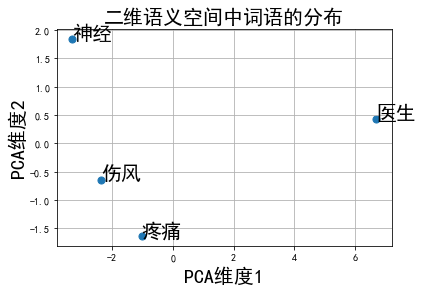

In [24]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

In [25]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1

In [26]:
from gensim.models import Word2Vec

model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

model.save('word2vec_ad.model')

Loss after epoch 0: 69775.4453125
Loss after epoch 1: 68753.0546875
Loss after epoch 2: 73303.75
Loss after epoch 3: 62632.375
Loss after epoch 4: 55253.90625
Loss after epoch 5: 51718.1875
Loss after epoch 6: 49507.71875
Loss after epoch 7: 47729.53125
Loss after epoch 8: 46208.90625
Loss after epoch 9: 38969.375
Loss after epoch 10: 43397.75
Loss after epoch 11: 42188.75
Loss after epoch 12: 40938.6875
Loss after epoch 13: 40306.625
Loss after epoch 14: 38476.75
Loss after epoch 15: 37514.5625
Loss after epoch 16: 36233.6875
Loss after epoch 17: 35457.75
Loss after epoch 18: 34376.625
Loss after epoch 19: 33323.8125
Loss after epoch 20: 28330.875
Loss after epoch 21: 28718.0
Loss after epoch 22: 30972.1875
Loss after epoch 23: 27316.9375
Loss after epoch 24: 26348.75
Loss after epoch 25: 28726.25
Loss after epoch 26: 25409.75
Loss after epoch 27: 24962.875
Loss after epoch 28: 27152.375
Loss after epoch 29: 24069.0
Loss after epoch 30: 26310.25
Loss after epoch 31: 23129.125
Loss aft